Performs basic k-means clustering through the explained variance after assuming four factors. Referenced https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [35]:
df = pd.read_csv('individual_scores_no_msceit.tsv', index_col=0, sep="\t")
df.head()

,MR1,MR2,MR3,MR4
1,1.468555,-0.855025,-1.224634,-0.469640
2,-1.620572,0.047498,-0.064412,-1.589821
3,-1.448779,1.329897,-1.316749,-0.288158
4,-1.356498,1.285890,0.048021,0.176034
5,-0.135143,-0.883142,-2.248959,-1.705623


In [36]:
print(df.shape)

(140, 4)


In [37]:
def kmean(df, numClusters):
    model = KMeans(n_clusters = numClusters, random_state = 10)
    labels = model.fit_predict(df.values)
    print(labels)
    
    # Determine the silhouette score average
    silhouette_avg = silhouette_score(df.values, labels)
    print(silhouette_avg)
    
    # Silhouette score for each participant
    participant_silhouette = silhouette_samples(df.values, labels)
    
    # Plot silhouette and clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.25, 1])
    ax1.set_ylim([0, len(df.values) + (numClusters + 1) * 10])
    y_lower = 10
    
    for i in range(numClusters):
        ith_silhouette = participant_silhouette[labels == i]
        ith_silhouette.sort()
        
        size_i = ith_silhouette.shape[0]
        y_upper = y_lower + size_i
        
        color = cm.nipy_spectral(float(i) / numClusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, 
                                  ith_silhouette, facecolor = color, 
                                  edgecolor = color, alpha = 0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_i, str(i))
        
        y_lower = y_upper + 10
    
    ax1.set_title("Silhouette plot")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle = "--")
    ax1.set_yticks([])
    
    # Show actual clusters (needs to be corrected, not sure what to plot here)
    colors = cm.nipy_spectral(labels.astype(float)/numClusters)
    ax2.scatter(df.values[:, 0], df.values[:, 1], marker=',',
               s = 30, lw = 0, alpha = 0.7, c=colors, edgecolor='k')
    
    plt.show()

[2 0 0 0 2 0 0 2 0 0 1 1 2 2 2 1 2 0 2 1 2 2 1 0 1 0 1 1 0 0 2 0 2 0 2 0 0
 1 2 1 0 1 2 1 1 1 1 2 2 1 1 0 1 2 2 2 0 0 2 1 1 1 0 1 2 0 1 2 1 1 2 1 0 2
 0 0 2 0 0 2 1 0 1 0 1 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 0 1 2 0 1 1 2
 2 1 1 0 2 2 1 1 1 2 2 1 1 0 2 2 1 0 0 2 1 0 0 2 0 1 2 2 1]
0.206858426535


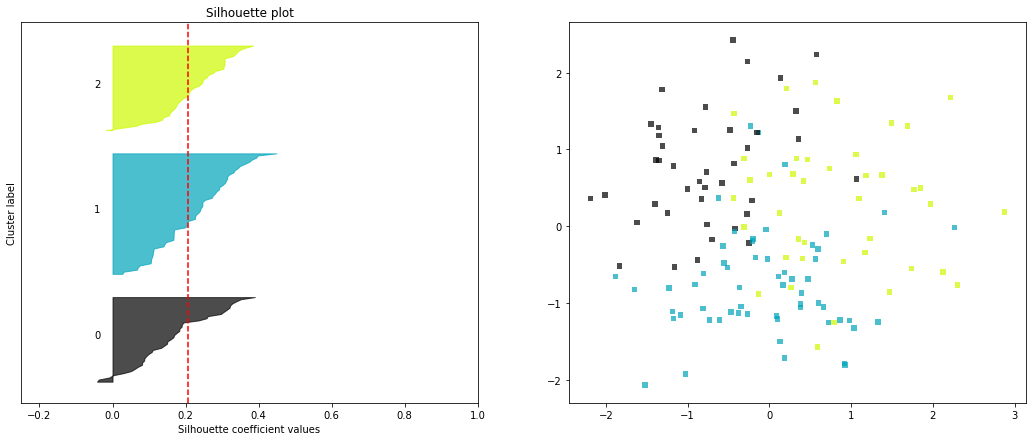

In [41]:
kmean(df, 3)

[2 3 0 3 0 3 3 0 3 0 1 1 2 0 0 1 0 3 0 2 0 2 2 0 1 3 2 1 1 3 0 1 2 3 2 3 1
 1 0 2 3 1 2 1 2 1 2 0 0 2 1 0 2 2 0 2 3 3 2 1 1 2 1 2 0 3 1 2 1 1 0 1 0 2
 3 3 0 3 1 0 0 3 1 0 1 1 3 2 2 1 2 2 1 1 2 1 2 1 1 1 1 1 3 2 3 3 2 3 2 1 2
 2 3 2 0 2 2 1 1 2 2 0 2 1 3 0 2 1 3 0 2 1 3 3 2 3 2 0 0 1]
0.20196430707


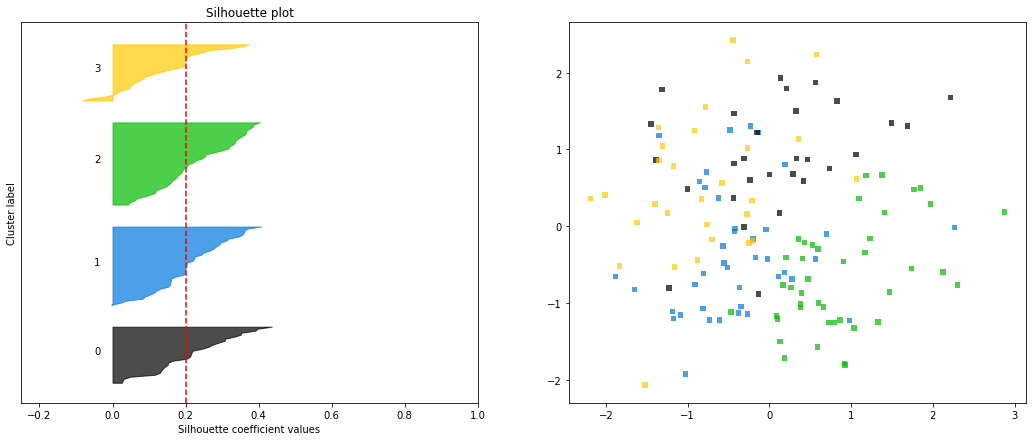

In [42]:
kmean(df, 4)

[1 4 4 4 4 0 3 4 3 3 0 0 1 4 2 0 2 3 2 1 4 1 1 4 0 3 1 0 0 0 2 0 1 3 1 3 0
 2 2 1 3 0 2 1 1 1 1 4 4 1 0 4 1 3 2 1 3 0 3 0 0 1 0 1 2 0 0 1 0 0 4 0 3 1
 3 3 2 3 0 4 4 4 1 4 0 0 3 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 3 1 0 0 2 0 1 0 2
 2 0 1 4 2 1 0 0 1 1 4 1 2 3 4 1 0 0 4 1 1 0 0 2 4 1 2 2 1]
0.204916988971


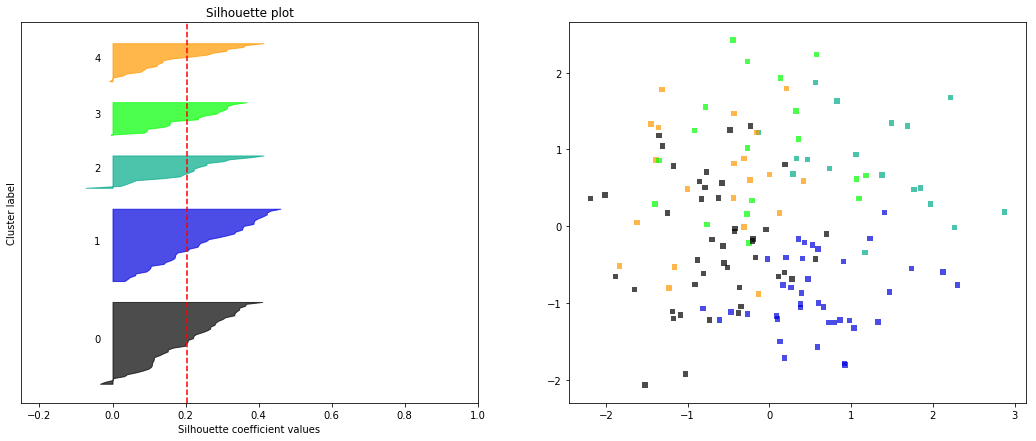

In [43]:
kmean(df, 5)

[1 4 4 0 4 0 3 4 3 3 2 0 1 4 5 2 5 3 5 1 4 1 1 4 0 3 1 2 2 0 5 0 1 3 1 3 0
 2 5 1 3 2 5 2 2 2 2 4 4 1 2 4 1 3 4 1 3 0 3 0 0 1 0 1 5 0 2 1 2 0 4 0 3 1
 3 3 5 0 0 4 4 3 1 4 2 0 3 1 1 2 1 1 0 0 1 0 1 0 0 2 2 0 3 1 0 0 5 0 1 0 5
 5 0 1 4 5 1 0 0 1 1 4 1 2 3 4 1 0 0 4 1 2 0 0 5 0 1 5 4 2]
0.207343255183


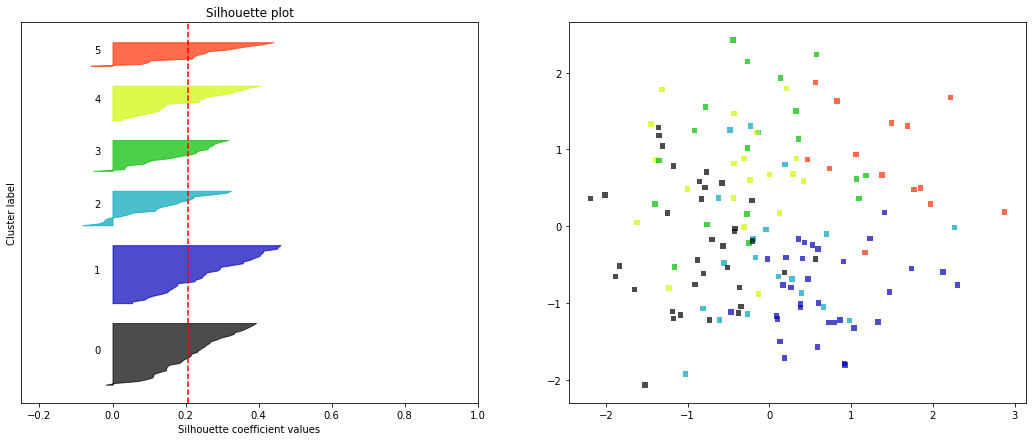

In [44]:
kmean(df, 6)

In [31]:
def elbow(df, rand_state, max_num):
    distortions = []
    all_c = range(1,max_num)
    for c in all_c:
        model = KMeans(n_clusters = c, random_state = rand_state)
        model.fit(df.values)
        distortions.append(model.inertia_)

    print(distortions)
    plt.plot(all_c, distortions)
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.show() 

[556.00000000000136, 431.16357852194557, 351.77007694412606, 308.03264941645625, 279.41781678119833, 248.43577473550144, 227.59215862974386, 207.32341508305606, 199.15290983706905]


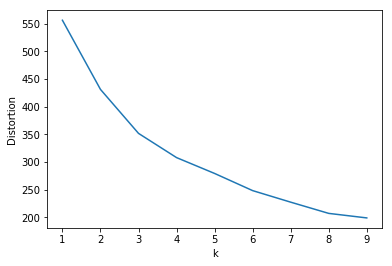

In [45]:
elbow(df, 20, 10)